In [1]:
%matplotlib inline
from graph import *
from kernel import *
from svm import SVM
import seaborn as sns
import matplotlib.pyplot as plt

[[ 6.66666667e-001+0.j -7.07106781e-001+0.j  6.66666667e-001+0.j ...
   0.00000000e+000+0.j  0.00000000e+000+0.j  0.00000000e+000+0.j]
 [-0.00000000e+000+0.j  0.00000000e+000+0.j  0.00000000e+000+0.j ...
   8.32667268e-017+0.j  0.00000000e+000+0.j  2.22044605e-016+0.j]
 [ 6.66666667e-001+0.j  7.07106781e-001+0.j  6.66666667e-001+0.j ...
   0.00000000e+000+0.j  0.00000000e+000+0.j  0.00000000e+000+0.j]
 ...
 [-8.33333333e-002+0.j -1.68572148e-017+0.j  8.33333333e-002+0.j ...
   6.73748248e-001+0.j -3.26251752e-001+0.j  5.29775244e-002+0.j]
 [-0.00000000e+000+0.j  0.00000000e+000+0.j  0.00000000e+000+0.j ...
   0.00000000e+000+0.j  0.00000000e+000+0.j  2.88469192e-260+0.j]
 [-8.33333333e-002+0.j -1.68572148e-017+0.j  8.33333333e-002+0.j ...
  -3.26251752e-001+0.j  6.73748248e-001+0.j  5.29775244e-002+0.j]]
[[ 6.66666667e-001+0.j -7.07106781e-001+0.j  6.66666667e-001+0.j ...
   0.00000000e+000+0.j  0.00000000e+000+0.j  0.00000000e+000+0.j]
 [-0.00000000e+000+0.j  0.00000000e+000+0.j  0.00

[[-6.32455532e-01+0.00000000e+00j  6.32455532e-01+0.00000000e+00j
  -1.71833422e-01+0.00000000e+00j  1.71833422e-01+0.00000000e+00j
  -7.32867350e-35-1.77864945e-33j -7.32867350e-35+1.77864945e-33j
   5.55750580e-33+5.94655593e-49j  5.55750580e-33-5.94655593e-49j
  -5.96402976e-49+1.68608453e-49j -5.96402976e-49-1.68608453e-49j
  -5.43697918e-50+2.79061153e-50j -5.43697918e-50-2.79061153e-50j
   1.69108420e-49-1.61274356e-55j  1.69108420e-49+1.61274356e-55j
  -4.52573423e-50+0.00000000e+00j  4.39241479e-50+0.00000000e+00j
  -1.18694597e-66+0.00000000e+00j  1.08390909e-66+0.00000000e+00j
  -1.02003169e-66+0.00000000e+00j -1.06286243e-66+0.00000000e+00j]
 [-5.17808132e-16+0.00000000e+00j -5.90060429e-16+0.00000000e+00j
  -6.08665159e-01+0.00000000e+00j -6.08665159e-01+0.00000000e+00j
  -2.82632527e-32+1.32686685e-02j -2.82632527e-32-1.32686685e-02j
   6.29013783e-01+0.00000000e+00j  6.29013783e-01-0.00000000e+00j
  -2.36123232e-17+8.30269524e-18j -2.36123232e-17-8.30269524e-18j
   2.3612

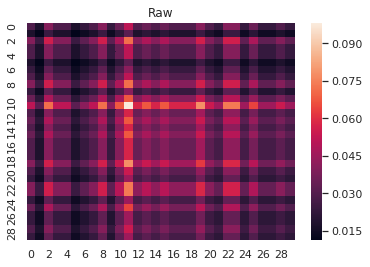

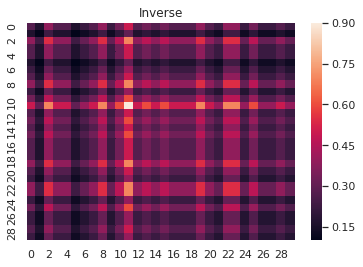

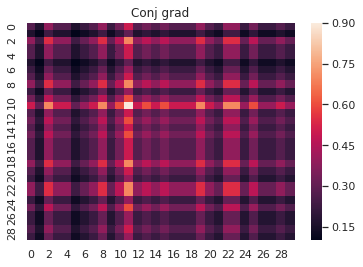

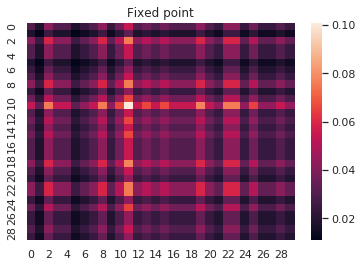

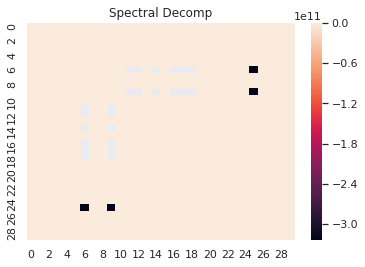

In [3]:
db = Database()
d = []
db2 = db.gen_database_test(9, 5, 5, 3)
N = np.max(db2[:,0].shape[0])
M = np.max([len(x.nonzero()[0]) for x in db2[:,0]])
ker = Kernel(0.9,N,M)
    s = SVM(db2, 0.7, 0.9, kernel="inv_kernel")
#brut
plt.title("Raw")
sns.heatmap(ker.build_gram_matrix(db2[:,0],kernel=ker.raw_kernel))
plt.figure()
plt.title("Inverse")
sns.heatmap(ker.build_gram_matrix(db2[:,0],kernel=ker.inv_kernel))
plt.figure()
plt.title("Conj grad")
sns.heatmap(ker.build_gram_matrix(db2[:,0],kernel=ker.conj_grad_kernel))
plt.figure()
plt.title("Fixed point")
sns.heatmap(ker.build_gram_matrix(db2[:,0],kernel=ker.fixed_point_kernel))
plt.figure()
plt.title("Spectral Decomp")
sns.heatmap(ker.build_gram_matrix(db2[:,0],kernel=ker.spec_decomp_kernel))

In [2]:
%%time
db = Database()
d = []
N = 30
for _ in range(N):
    db2 = db.gen_database_test(9, 5, 5, 3)
    s = SVM(db2, 0.7, 0.9, kernel="inv_kernel")
    d.append(s.cross_val_score(5))
print("Mean acc = ",sum([x["accuracy"] for x in d])/N)
print("Mean time = ",sum([x["time"] for x in d])/N)
print("Mean std = ",sum([x["stddev"] for x in d])/N)
#rajouter labels
# somme de k = Wx.shape ou 10xWx.shape ne change rien
#normalisé bcp plus rapide (pas toujour)
# certains ont un meilleur score avec d'autres que eux mêmes 
#affichage des graphes et dérouler l'algo à la main pour les carrés noir
#faire avec labels 2~5 et essayer d'avoir des distributions de labels pas trop différentes entre les toplogies

Mean acc =  0.49999999999999994
Mean time =  0.46909941037495934
Mean std =  0.16049890296262528
CPU times: user 25.4 s, sys: 29.2 s, total: 54.7 s
Wall time: 14.6 s
